In [2]:
!pip install numpy

    100% |████████████████████████████████| 16.9MB 149kB/s ta 0:00:01   21% |███████                         | 3.7MB 399kB/s eta 0:00:34    33% |██████████▉                     | 5.7MB 129kB/s eta 0:01:27    57% |██████████████████▌             | 9.8MB 259kB/s eta 0:00:28


In [20]:
!pip install matplotlib

    100% |████████████████████████████████| 14.6MB 135kB/s ta 0:00:01   67% |█████████████████████▊          | 9.9MB 67kB/s eta 0:01:10
    100% |████████████████████████████████| 61kB 161kB/s ta 0:00:01
    100% |████████████████████████████████| 491kB 113kB/s ta 0:00:01


1.	处理附件所给数据，显示出清晰的等离子体层图像。 ok
2.	确定图像中地心坐标以及地球边界位置。 ok
3.	确定地球等离子体层顶位置，拟合出等离子体层顶形状。
4.	以地心为原点，在图像坐标系中确定太阳方位。
5.	根据题目，图像亮度可以表示沿射线方向的柱密度积分，你是否可以建立一个数学模型，由二维图像亮度反演出三维等离子体密度分布？


In [192]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [188]:
#键值对式序列化库
PICKLE_PATH='./softfits.pick'
import shelve
def set_pickle(k='temp',v=''):
    with shelve.open(PICKLE_PATH) as file:
        file[k]=v

def get_pickle(k):
    if k is None:
        return False
    with shelve.open(PICKLE_PATH) as file:
        try:
            v=file[k]
        except KeyError:
            return None
        else:
            return v

In [3]:
from astropy.io import fits

In [23]:
img1=fits.open("/home/wy/Downloads/fits/a01.fits")
img2=fits.open("/home/wy/Downloads/fits/a03.fits")
img3=fits.open("/home/wy/Downloads/fits/a08.fits")
img4=fits.open("/home/wy/Downloads/fits/a11.fits")
img5=fits.open("/home/wy/Downloads/fits/a13.fits")

In [191]:
np.save('myimg1',img1[0].data)

In [189]:
set_pickle('img1',img1[0].data)

In [89]:
def show_fits(file,zoom=1):
    def show_header(header):
        string=header.tostring()
        strlist=[string[i:i+80].strip() for i in range(0,len(string),80)]
        strlist=[i for i in strlist if i !='']
        for i in strlist:
            print(i)
    file.info()
    print('------------')
    show_header(file[0].header)
    plt.imshow(file[0].data)

SIMPLE,BITPIX,NAXIS,NAXISn 和 END。它们的含义是: 
1. SIMPLE 逻辑变量,指明文件是否符合基本 FITS 标准。 
2. BITPIX 整数变量,指明用于表示每一个象元值的位数。 
3. NAXIS 整数变量,指明图象里坐标轴数。 
4. NAXIS1 整数变量,指明在数组内沿最快变化轴的象元数。 
5. NAXIS2 整数变量,指明在数组内沿次快变化轴的象元数。

In [105]:
def zoom_pic(pic,zoom=(300,300),pos=(0,0)):
    shap=pic.shape
    slic=pic[200:400,200:400]
    return slic

In [194]:
cc=img1[0].data
cc=cc.copy()

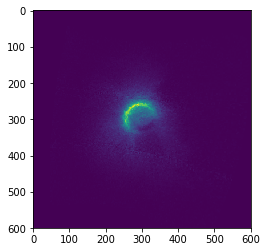

In [195]:
plt.imshow(cc)

In [196]:
cc=cc.reshape(1,-1)

In [198]:
cc.max(),cc.min(),cc.mean(),cc.std()

(873.53973, 0.0, 18.59062, 56.717899)

/home/wy/Astropy/lib/python3.4/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


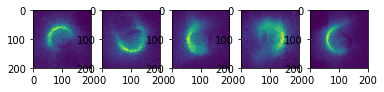

In [106]:
f, a = plt.subplots(1, 5)
a[0].imshow(zoom_pic(img1[0].data))
a[1].imshow(zoom_pic(img2[0].data))
a[2].imshow(zoom_pic(img3[0].data))
a[3].imshow(zoom_pic(img4[0].data))
a[4].imshow(zoom_pic(img5[0].data))
f.show()

In [117]:
plt.imsave('./euv1.png',img1[0].data)
plt.imsave('./euv2.png',img2[0].data)
plt.imsave('./euv3.png',img3[0].data)
plt.imsave('./euv4.png',img4[0].data)
plt.imsave('./euv5.png',img5[0].data)

In [108]:
import cv2

In [142]:
aimg1 = cv2.imread('./euv1.png')
gray = cv2.cvtColor(aimg1,cv2.COLOR_BGR2GRAY)
#需要滤波(降噪)，卷积(缩小尺寸，使圆的边缘更细)
#需要聚类(发现大的亮色块)
#如若可以准确确定地球的圆心和半径，以及亮色块的位置则
#可以以地球为中心，扇区选择地球阴影。

#考虑利用fits文件中的参数

In [144]:
aimg1.shape

(600, 600, 3)

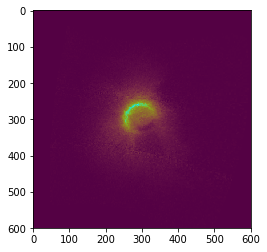

In [143]:
plt.imshow(aimg1)

In [149]:
#累加器的阈值估计可以调小点
cir1=cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,2,200,param1=100,param2=30,minRadius=50,maxRadius=100)

#第一个参数
一个灰度图


#第二个参数method
使用的检测方法 写这个即可


#第三个参数dp
用来检测内侧圆心的累加器图像的分辨率于输入图像之比的倒数。
如dp=1，累加器和输入图像具有相同的分辨率，如果dp=2，累计器便有输入图像一半那么大的宽度和高度


#第四个参数minDist
为霍夫变换检测到的圆的圆心之间的最小距离，即让算法能明显区分的两个不同圆之间的最小距离。
如果这个参数太小，多个相邻的圆可能被错误的检测成了一个重合的圆，反之，参数设置太大，某些圆就不能被检测出来


#第五个参数param1
有默认值100，它是method设置的检测方法的对应的参数，对当前唯一的方法霍夫梯度法cv2.HOUGH_GRADIENT，它表示传递给canny边缘检测算子的高阈值，而低阈值为高阈值的一半


#第六个参数param2
有默认值100，它是method设置的检测方法的对应的参数，对当前唯一的方法霍夫梯度法cv2.HOUGH_GRADIENT，它表示在检测阶段圆心的累加器阈值，它越小，就越可以检测到更多根本不存在的圆，而它越大的话，能通过检测的圆就更加接近完美的圆形了。


#第七个参数minRadius
有默认值0，圆半径的最小值
#第八个参数maxRadius
有默认值0，圆半径的最大值

In [150]:
type(cir1)

numpy.ndarray

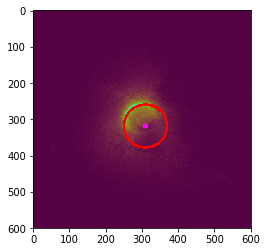

In [151]:
circles = cir1[0,:,:]#提取为二维
circles = np.uint16(np.around(circles))#四舍五入，取整
for i in circles[:]: 
    cv2.circle(aimg1,(i[0],i[1]),i[2],(255,0,0),5)#画圆
    cv2.circle(aimg1,(i[0],i[1]),2,(255,0,255),10)#画圆心
plt.imshow(aimg1)

Filename: /home/wy/Downloads/fits/a01.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       9   (600, 600)   float32   
------------
SIMPLE  =                    T / Written by IDL:  Wed Nov 09 15:26:25 2011
BITPIX  =                  -32 /
NAXIS   =                    2 /
NAXIS1  =                  600 /
NAXIS2  =                  600 /
ANG_MODE=                    0 /
MAX_L   =              8.00000 /
JUL_DAY =        52068.5024000 /
SHADOWAN=        66.2791434374 /
END


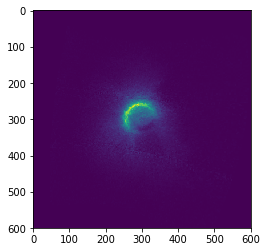

In [100]:
show_fits(img1)

Filename: /home/wy/Downloads/fits/a03.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       9   (600, 600)   float32   
------------
SIMPLE  =                    T / Written by IDL:  Wed Nov 09 15:27:21 2011
BITPIX  =                  -32 /
NAXIS   =                    2 /
NAXIS1  =                  600 /
NAXIS2  =                  600 /
ANG_MODE=                    0 /
MAX_L   =              8.00000 /
JUL_DAY =        52068.9988700 /
SHADOWAN=        255.872725091 /
END


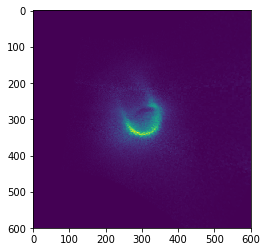

In [85]:
show_fits(img2)

Filename: /home/wy/Downloads/fits/a08.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       9   (600, 600)   float32   
------------
SIMPLE  =                    T / Written by IDL:  Wed Nov 09 15:28:45 2011
BITPIX  =                  -32 /
NAXIS   =                    2 /
NAXIS1  =                  600 /
NAXIS2  =                  600 /
ANG_MODE=                    0 /
MAX_L   =              8.00000 /
JUL_DAY =        52069.7512000 /
SHADOWAN=        341.605882793 /
END


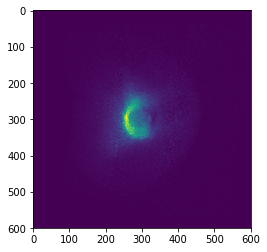

In [86]:
show_fits(img3)

Filename: /home/wy/Downloads/fits/a11.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       9   (600, 600)   float32   
------------
SIMPLE  =                    T / Written by IDL:  Wed Nov 09 15:29:24 2011
BITPIX  =                  -32 /
NAXIS   =                    2 /
NAXIS1  =                  600 /
NAXIS2  =                  600 /
ANG_MODE=                    0 /
MAX_L   =              8.00000 /
JUL_DAY =        52070.2476600 /
SHADOWAN=        159.967396925 /
END


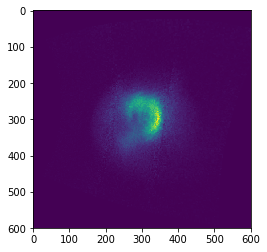

In [87]:
show_fits(img4)

Filename: /home/wy/Downloads/fits/a13.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       9   (600, 600)   float32   
------------
SIMPLE  =                    T / Written by IDL:  Wed Nov 09 15:29:45 2011
BITPIX  =                  -32 /
NAXIS   =                    2 /
NAXIS1  =                  600 /
NAXIS2  =                  600 /
ANG_MODE=                    0 /
MAX_L   =              8.00000 /
JUL_DAY =        52070.7512500 /
SHADOWAN=        341.640577976 /
END


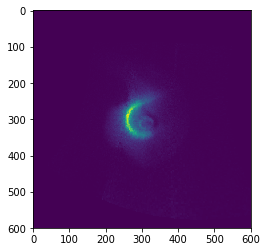

In [88]:
show_fits(img5)